In [ ]:
#Q1：ALK有40阴性。意思是剩下60是阳性吗？还是没参加测试。
#Q2：有人又失访，又PFS事件，哪个当截尾信息呢？
#Q3：生存分析的事件变量怎么算？

In [61]:
import numpy as np
import pandas as pd
import os
from openpyxl import utils
import warnings
import statistics
warnings.filterwarnings("ignore", category=UserWarning)
from scipy.stats import fisher_exact

from lifelines import KaplanMeierFitter
import matplotlib.pyplot as plt

In [3]:
统计 = pd.read_excel('C:/Users/NC-O10/Dropbox/云蜚科技/脂质紫杉醇/紫杉醇干净的数据.xlsx', sheet_name='统计用100例')
交差 = pd.read_excel('C:/Users/NC-O10/Dropbox/云蜚科技/脂质紫杉醇/紫杉醇干净的数据.xlsx', sheet_name='交差100例')

In [ ]:
## 一. 描述性分析

In [38]:
#年龄recoding
from datetime import datetime
确诊年龄= 统计['确诊年龄']
df = pd.DataFrame(确诊年龄)

# Remove rows with NA values
年龄 = df.dropna()
#print(年龄)
中位数_年龄=np.mean(年龄)
年龄max=np.max(年龄)
年龄min=np.min(年龄)
print(中位数_年龄)
print(年龄min)
print(年龄max)
#recode 年龄 greater than mean=1, lower than mean=0
# Assuming you have a DataFrame with an 'Age' column
# Sample age values with NA
ages = 统计['确诊年龄']
年龄_中位 = pd.DataFrame({'Age': ages})
# Fill NA values with a specific value (e.g., 0)
年龄_中位['Age'] = 年龄_中位['Age'].fillna(64)

#print(年龄_中位)
年龄recode = pd.DataFrame({'Age': 统计['确诊年龄']})

# Calculate the mean age
mean_age = 64.1

# Create a new column for recoded categories
年龄recode['Age_Category'] = ''
年龄recode=年龄recode.fillna(0)
# Recode ages based on mean
年龄recode.loc[年龄recode['Age'] > mean_age, 'Age_Category'] = '1'
年龄recode.loc[年龄recode['Age'] < mean_age, 'Age_Category'] = '0'

# Print the updated DataFrame
#print(年龄recode)
ALK=统计['ALK']
ALK=统计['ALK'].fillna(1)
ALK_recoded = ALK.where(ALK != '阴性', 0)
#print(ALK_recoded)
#calculate the fisher's exact test p-value
from scipy.stats import fisher_exact
import pandas as pd
# Assuming you have a DataFrame with exposure and outcome columns
紫杉醇_年龄 = pd.DataFrame({'Exposure': 年龄recode['Age_Category'],
                   'Outcome': ALK_recoded})
# Use replace() method to recode the variable
# Extract the exposure and outcome columns as separate variables
exposure = 紫杉醇_年龄['Exposure']
outcome = 紫杉醇_年龄['Outcome']
# Perform Fisher's exact test
odds_ratio, p_value = fisher_exact(pd.crosstab(exposure, outcome))
# Print the results
#print("Odds Ratio:", odds_ratio)
print("p-value:", p_value)

64.11627906976744
38.0
81.0
p-value: 0.4135961199851336


In [40]:
#性别
age=统计['性别'].describe()
print(age)

count     100
unique      2
top         男
freq       98
Name: 性别, dtype: object


In [42]:
#清病理
病理=统计['清病理'].value_counts()
print(病理)

清病理
鳞状细胞癌    85
非小细胞癌    10
腺癌        4
Name: count, dtype: int64


In [43]:
#TNM
TNM=统计['TNM分期'].value_counts()
print(TNM)

TNM分期
IV      36
IIIB    32
IVA     17
IVB     10
IIIC     5
Name: count, dtype: int64


In [44]:
#EGFR
EGFR=统计['EGFR'].value_counts()
print(EGFR)

EGFR
阴性    40
阳性     1
Name: count, dtype: int64


In [45]:
#ALK
ALK=统计['ALK'].value_counts()
print(ALK)

ALK
阴性    40
Name: count, dtype: int64


In [47]:
#用药周期
用药周期=统计['最大用药周期数更新'].value_counts()
print(用药周期)

最大用药周期数更新
4    31
2    30
3    19
5    12
6     6
8     1
7     1
Name: count, dtype: int64


In [48]:
#剂量
剂量=统计['紫杉醇脂质体总剂量（mg）'].describe()
print(剂量)

count      98.000000
mean      794.418367
std       402.080618
min       180.000000
25%       510.000000
50%       705.000000
75%      1080.000000
max      1800.000000
Name: 紫杉醇脂质体总剂量（mg）, dtype: float64


In [49]:
#联合通用名
联合通用名=统计['联合免疫用药通用名'].value_counts()
print(联合通用名)

联合免疫用药通用名
替雷利珠单抗    61
帕博利珠单抗    19
信迪利单抗     14
卡瑞利珠单抗     3
度伐利尤单抗     2
特瑞普利单抗     1
Name: count, dtype: int64


In [50]:
#联合用药周期
联合用药周期=统计['联合免疫用药周期数'].value_counts()
print(联合用药周期)

联合免疫用药周期数
2     32
3     25
1     13
4     10
5      7
7      3
10     2
12     2
9      2
6      2
8      2
Name: count, dtype: int64


In [ ]:
## 二. 生存分析

In [ ]:
#是否失访
失访=统计['是否失访'].value_counts()
print(失访)
#是否回顾
回顾=统计['是否回顾'].value_counts()
print(回顾)
#有无PFS事件
PFS=统计['有无PFS事件'].value_counts()
print(PFS)


In [66]:

# Convert date columns to datetime data type
联合用药时间={'start':统计['联合免疫用药开始日期'] ,'end': 统计['联合免疫用药结束日期']}
联合时间=pd.DataFrame(联合用药时间)
联合时间['start'] = pd.to_datetime(联合时间['start'] )
联合时间['end'] = pd.to_datetime(联合时间['end'])

# Subtract the columns and create a new column with the result
联合时间['date_difference'] = 联合时间['end'] - 联合时间['start']

# Print the resulting dataset
print(联合时间['date_difference'])


0     67 days
1    144 days
2    323 days
3    356 days
4    157 days
       ...   
95    51 days
96     0 days
97    26 days
98    27 days
99    26 days
Name: date_difference, Length: 100, dtype: timedelta64[ns]


是否失访
0    82
1    18
Name: count, dtype: int64
是否回顾
1    58
0    42
Name: count, dtype: int64
有无PFS事件
0    55
1    45
Name: count, dtype: int64


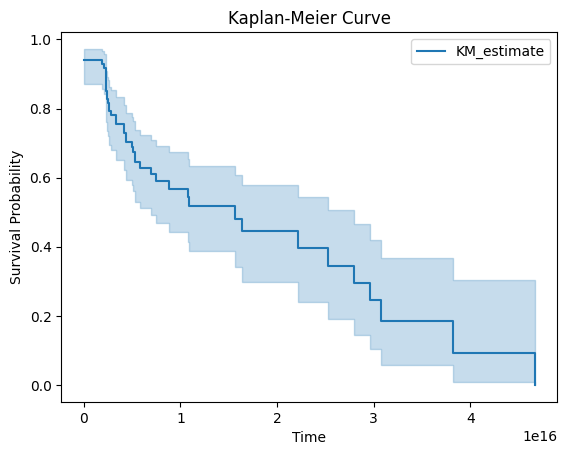

In [67]:
data = {
    'time': 联合时间['date_difference'],
    'event': 统计['有无PFS事件']
}

df = pd.DataFrame(data)

# Fit Kaplan-Meier estimator
kmf = KaplanMeierFitter()
kmf.fit(df['time'], event_observed=df['event'])

# Generate KM curve
kmf.plot()
plt.xlabel('Time')
plt.ylabel('Survival Probability')
plt.title('Kaplan-Meier Curve')
plt.show()

In [ ]:
## 三. 疗效评估

In [51]:
疗效评价=统计['最佳疗效']

# number of PR
# Count the occurrences of a specific string in a column
PR = 'PR'
count = (统计['最佳疗效'] == PR).sum()
# Print the count
print("Count of '{}' is {}".format(PR, count))

# number of SD
# Count the occurrences of a specific string in a column
SD = 'SD'
count = (统计['最佳疗效'] == SD).sum()
# Print the count
print("Count of '{}' is {}".format(SD, count))

# number of PD
# Count the occurrences of a specific string in a column
PD = 'PD'
count = (统计['最佳疗效'] == PD).sum()
# Print the count
print("Count of '{}' is {}".format(PD, count))
# number of CR
# Count the occurrences of a specific string in a column
CR = 'CR'
count = (统计['最佳疗效'] == CR).sum()
# Print the count
print("Count of '{}' is {}".format(CR, count))

#PR SD PD CR
PR=51/(51+50+18+13)
print("PR='{}'".format(PR))
SD=50/(51+50+18+13)
print("SD='{}'".format(SD))
PD=18/(51+50+18+13)
print("PD='{}'".format(PD))
CR=13/(51+50+18+13)
print("CR='{}'".format(CR))

#ORR DCR
ORR=CR+PR
print("ORR='{}'".format(ORR))
DCR=ORR+SD
print("DCR='{}'".format(DCR))

Count of 'PR' is 43
Count of 'SD' is 29
Count of 'PD' is 4
Count of 'CR' is 4
PR='0.38636363636363635'
SD='0.3787878787878788'
PD='0.13636363636363635'
CR='0.09848484848484848'
ORR='0.48484848484848486'
DCR='0.8636363636363636'
